In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

### Data Pipeline

In [2]:
test_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.png')
test_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.png')
train_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpeg') +glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.png')
train_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.png')
val_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpg') +glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpeg')
val_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.jpg')

In [3]:
def preprocess_test_images(filepath):
    try:
        img = tf.io.read_file(filepath)
        img = tf.image.decode_image(img, channels=3, expand_animations=False)
        img = tf.image.resize_with_pad(img, 218, 180)
        img = tf.cast(img, tf.float32) / 255.0
        print(f"Image shape: {img.shape}")
        return img
    except Exception as e:
        print(f"Error processing image {filepath}: {e}")
        return None

In [4]:
def safe_preprocess_test_images(filepath):
    try:
        return preprocess_test_images(filepath)
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
        return None

testnoimgdataset = tf.data.Dataset.from_tensor_slices(test_no_filepaths)
testnoimgdataset = testnoimgdataset.map(safe_preprocess_test_images)
testnoimgdataset = testnoimgdataset.filter(lambda x: x is not None)

Image shape: (218, 180, 3)


In [5]:
testyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)
trainyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size= True )
valyesimgtensor = tf.TensorArray(tf.float32 , size = 0 , dynamic_size = True)

In [6]:
testyesdataset = tf.data.Dataset.from_tensor_slices(test_yes_filepaths)
testyesdataset = testyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [7]:
trainyesdataset = tf.data.Dataset.from_tensor_slices(train_yes_filepaths)
trainyesdataset = trainyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [8]:
for img in trainyesdataset:
    if len(img.shape) != 3 or img.shape[2] != 3:
        print(f"Unexpected shape: {img.shape}")

In [9]:
valyesdataset = tf.data.Dataset.from_tensor_slices(val_yes_filepaths)
valyesdataset = valyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [10]:
for img in testyesdataset:
    testyesimgtensor = testyesimgtensor.write(testyesimgtensor.size() , img)
    
testyesimgtensor = testyesimgtensor.stack()

In [11]:
for im in trainyesdataset:
    trainyesimgtensor = trainyesimgtensor.write(trainyesimgtensor.size() , im)

In [12]:
for img in valyesdataset:
    valyesimgtensor = valyesimgtensor.write(valyesimgtensor.size() , img)

In [13]:
valyesimgtensor = valyesimgtensor.stack()

In [14]:
trainyesimgtensor = trainyesimgtensor.stack()

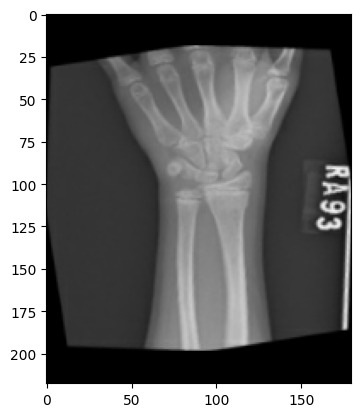

In [15]:
plt.figure()
plt.imshow(trainyesimgtensor[15])

In [17]:
testnoimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)

In [19]:
def safe_process_image(filepath):
    try:
        img = tf.io.read_file(filepath)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [218, 180])
        img = img / 255.0
        return img
    except Exception as e:
        print(f"Error processing image at {filepath}: {str(e)}")
        return None

testnoimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)

for filepath in test_no_filepaths:
    img = safe_process_image(filepath)
    if img is not None:
        try:
            testnoimgtensor = testnoimgtensor.write(testnoimgtensor.size(), img)
        except Exception as e:
            print(f"Error writing image to tensor: {e}")

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\isthi\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3551, in run_code
    return outflag  File "C:\Users\isthi\AppData\Local\Temp\ipykernel_52452\2067301531.py", line 1, in <module>
    for img in testnoimgdataset:  File "C:\Users\isthi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
Error processing image at Bone_Fracture_Binary_Classification\test\not fractured\IMG0004134.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]
Error processing image at Bone_Fractur

In [20]:
testnoimgtensor = testnoimgtensor.stack()

In [21]:
testnoimgtensor.shape

TensorShape([262, 218, 180, 3])

In [24]:
trainnoimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)

for img in train_no_filepaths:
    img = safe_process_image(img)
    if img is not None:
        try:
            trainnoimgtensor = trainnoimgtensor.write(trainnoimgtensor.size(), img)
        except Exception as e:
            print(f"Error writing image to tensor: {e}")    

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\isthi\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3551, in run_code
    return outflag  File "C:\Users\isthi\AppData\Local\Temp\ipykernel_52452\2335038836.py", line 3, in <module>
    for img in trainnoimgdataset:  File "C:\Users\isthi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
Error processing image at Bone_Fracture_Binary_Classification\train\not fractured\IMG0004134.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]
Error processing image at Bone_Fract

In [25]:
trainnoimgtensor = trainnoimgtensor.stack()

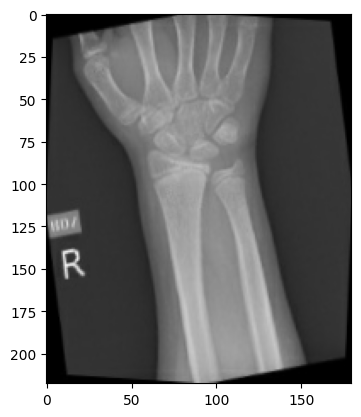

In [33]:
plt.figure()
plt.imshow(trainnoimgtensor[15])

In [28]:
valnoimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)
for img in val_no_filepaths:
    img = safe_process_image(img)
    if img is not None:
        try:
            valnoimgtensor = valnoimgtensor.write(valnoimgtensor.size(), img)
        except Exception as e:
            print(f"Error writing image to tensor: {e}")

Error processing image at Bone_Fracture_Binary_Classification\val\not fractured\IMG0004134.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]
Error processing image at Bone_Fracture_Binary_Classification\val\not fractured\IMG0004143.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]
Error processing image at Bone_Fracture_Binary_Classification\val\not fractured\IMG0004148.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeJpeg]
Error processing image at Bone_Fracture_Binary_Classification\val\not fractured\IMG0004149.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed

In [29]:
valnoimgtensor = valnoimgtensor.stack()

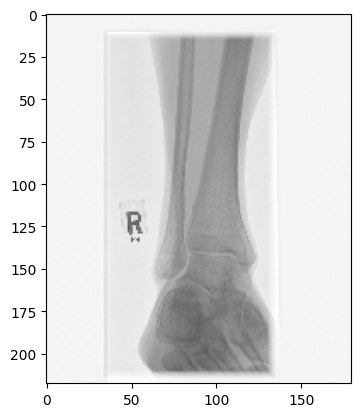

In [34]:
plt.figure()
plt.imshow(valnoimgtensor[15])

## Model